In [49]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
img = cv.imread('images/road_2.jpg')

In [51]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# plt.figure()
# plt.imshow(img)
# plt.show()

In [52]:
print(img.shape)
height = img.shape[0]
width = img.shape[1]

(720, 1280, 3)


In [53]:
region_of_interest_vertices = [
    (0, height),
    (width/2 - width*0.04, height/2 + height*0.01),
    (width, height)
]

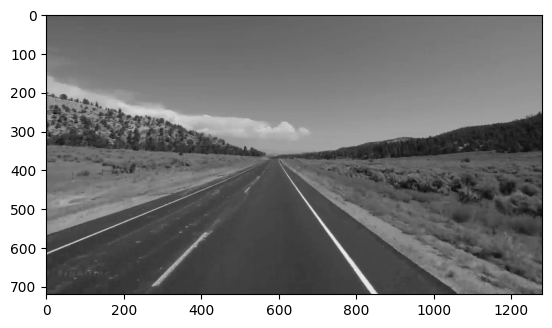

In [54]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img_gray, 'gray')
plt.show()

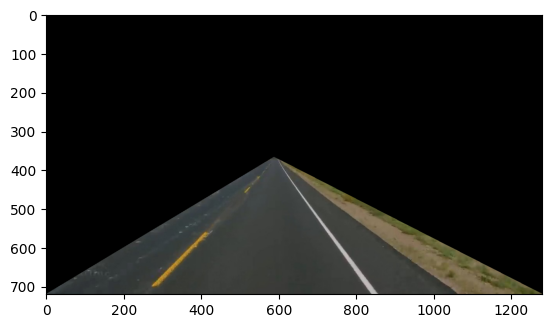

In [55]:
def region_of_interest(image, vertices):
    mask = np.zeros_like(image)
    channels_count = image.shape[-1] if len(image.shape) == 3 else 1
    match_mask_color = (255,) * channels_count

    cv.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv.bitwise_and(img, mask)

    return masked_image

cropped_image = region_of_interest(img, np.array([region_of_interest_vertices], np.int32))

plt.imshow(cropped_image)

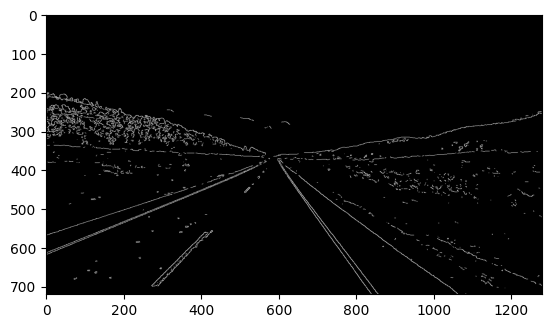

In [56]:
edges = cv.Canny(img_gray, 115, 125, apertureSize=3)
plt.figure()
plt.imshow(edges, 'gray')
plt.show()

In [57]:
lines = cv.HoughLinesP(edges, 1, np.pi/180, 30, minLineLength=44, maxLineGap=10)

In [58]:
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()